In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
%matplotlib inline

# Classification Examples: Medicine



In [2]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


This dataset represents a doctor's patients

**Question:** How many patiences?

In [3]:
ckd.num_rows

158

These patiences are classified by whether they have kidney disease or not?

**Question:** Which column do you think indicates this?

In [4]:
ckd.labels

('Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cell',
 'Pus Cell clumps',
 'Bacteria',
 'Glucose',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Class')

In [5]:
ckd.column('Class')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [6]:
sum(ckd.column('Class'))

43

In [7]:
np.count_nonzero(ckd.column('Class'))

43

In [8]:
ckd.group('Class')

Class,count
0,115
1,43


**Question:** Now that we know it is `Class`, how many patients had kidney disease and how many didn't?
    <details>,
<summary>Solution</summary>
  ckd.group('Class')
</details>


**Question:** Can we predict whether a patience has kidney disease based on their Glocuse levels?
    <details>,
<summary>Solution</summary>
  Maybe
</details>


**Question:** What's our method to determine if we can?
       <details>,
<summary>Solution</summary>
    <h3>Visualize then quantify</h3>
    
</details>

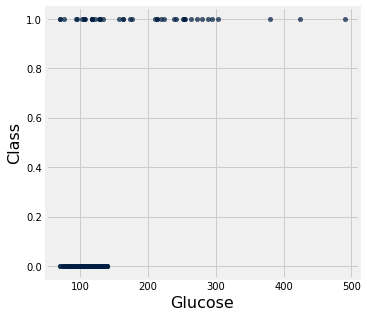

In [9]:
ckd.scatter('Glucose', 'Class')

**Question:** How can we visualzie?

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:3405: FutureWarning: scatter(colors=x) has been removed. Use scatter(group=x)
  warnings.warn("scatter(colors=x) has been removed. Use scatter(group=x)", FutureWarning)


AttributeError: 'PathCollection' object has no property 'colors'

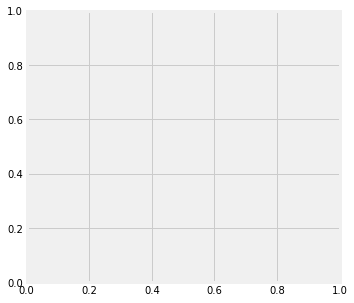

In [10]:
ckd.scatter('White Blood Cell Count', 'Glucose', colors='Class')

Let's fix this error

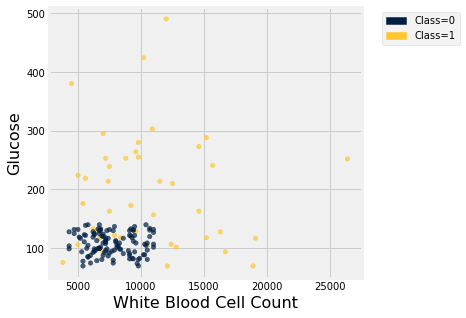

In [11]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Class')

Let's talk about this visualization. How would we classify whether a patience had kidney disease based on their gluclose levels and white blood cell count?

(skip)

In [12]:
ckd.labels

('Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cell',
 'Pus Cell clumps',
 'Bacteria',
 'Glucose',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Class')

**Question:** What about predicting kidney disease based on Hemoglobin and Glucose?

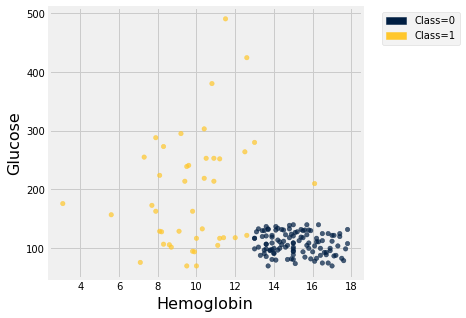

In [13]:
ckd.scatter("Hemoglobin", "Glucose", group="Class")

# Classification Examples: Counterfeit Banknotes

let's look at another example

In [14]:
banknotes = Table.read_table('banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


**Question:** Which column here indicates for us whether the bill is counterfeit or not?

**Question:** What are the possible values for this column? Is it binary (yes or no), or maybe trinary (yes or no or maybe)?


**Question:** What columns should we use to predict whether a bill was counterfeit or not?

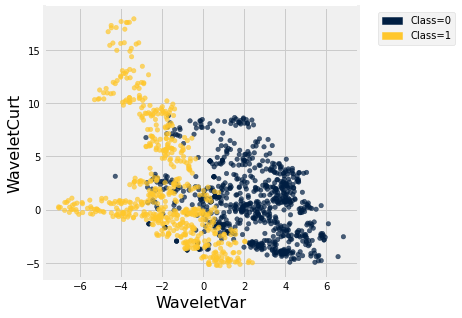

In [15]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Class')

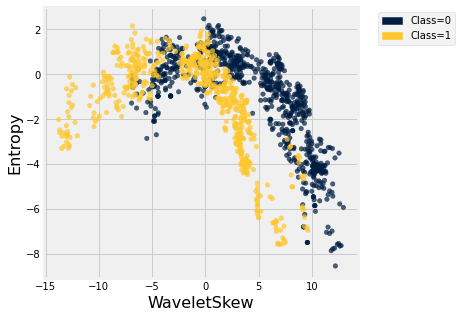

In [16]:
banknotes.scatter('WaveletSkew', 'Entropy', group='Class')

**Question:** Which of these are better?

**Question:** What if we try making the prediction based on all of the features?

Notice what the I called the given columns here in this question 

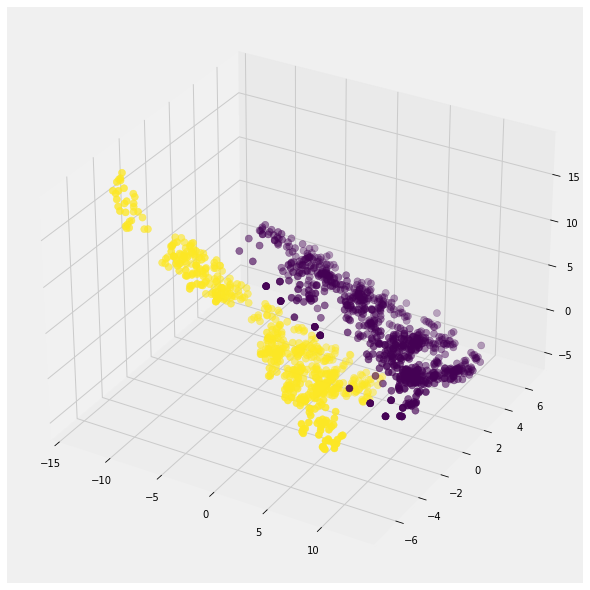

In [17]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'),
           cmap='viridis',
           s=50);

# Distance

In [30]:
def distance_ckd(row, attribute_1, attribute_2):
    """
    The column names of our attributes
    """
    x_difference = row.column(attribute_1) - ckd.column(attribute_1)
    y_difference = row.column(attribute_2) - ckd.column(attribute_2)
    return np.sqrt(np.square(x_difference) + np.square(y_difference))

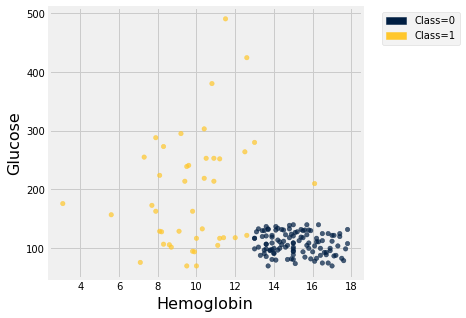

In [18]:
ckd.scatter("Hemoglobin", "Glucose", group="Class")

In [19]:
ckd_small = ckd.select("Hemoglobin", "Glucose", "Class")
ckd_small 

Hemoglobin,Glucose,Class
11.2,117,1
9.5,70,1
10.8,380,1
5.6,157,1
7.7,173,1
9.8,95,1
12.5,264,1
10,70,1
10.5,253,1
9.8,163,1


In [25]:
#ckd_small.sample(1)
test_example_index = np.random.choice(ckd_small.num_rows)
print("The text example index is: ",  test_example_index)
test_individual = ckd_small.item(test_example_index)
test_individual

The text example index is:  113


/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


Hemoglobin,Glucose,Class
17.5,83,0


In [38]:
x = 2.5
y = "hello "

#int(str(x)) #+ y
int(2.5)

2

In [41]:
ckd_small_distance = ckd_small.with_columns(
    'Distance from ' + str(test_example_index), 
    distance_ckd(test_individual, "Hemoglobin", "Glucose")
)

In [42]:
ckd_small_distance.where('Distance from ' + str(test_example_index), are.below(0))

Hemoglobin,Glucose,Class,Distance from 113


**Question:** What is the value of "Distance from 113" for the 113-th example?

In [50]:
ckd_small_distance_no_113 = ckd_small_distance.where('Distance from ' + str(test_example_index), are.not_equal_to(0))

In [51]:
ckd_small_distance_no_113

Hemoglobin,Glucose,Class,Distance from 113
11.2,117,1,34.5788
9.5,70,1,15.2643
10.8,380,1,297.076
5.6,157,1,74.9507
7.7,173,1,90.532
9.8,95,1,14.258
12.5,264,1,181.069
10,70,1,15.0083
10.5,253,1,170.144
9.8,163,1,80.3697


Let's determine the class of the closest data point that we've observed so far

In [54]:
test_individual.drop('Class')

Hemoglobin,Glucose
17.5,83


In [60]:
# Step 1: find closest datapoint
# Step 2: find the class of that clsoes example 

smallest_distance = min(ckd_small_distance_no_113.column('Distance from 113'))
smallest_distance

1.3000000000000007

In [63]:
ckd_small_distance_no_113.where('Distance from 113', are.equal_to(smallest_distance)).column('Class').item(0)

0

# Defining a Classifier

In [ ]:
patients = Table.read_table('breast-cancer.csv').drop('ID')
patients.show(5)

In [ ]:

patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', group='Class')

In [ ]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

jittered.scatter('Bland Chromatin (jittered)', 'Single Epithelial Cell Size (jittered)', group='Class')

# Distance

In [ ]:
Table().with_columns(['X', [0, 2, 3], 'Y', [0, 2, 4]]).scatter('X', 'Y')

In [ ]:
def distance(pt1, pt2):
    """Return the distance between two points (represented as arrays)"""
    return np.sqrt(np.sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(make_array(row1), make_array(row2))

In [ ]:
attributes = patients.drop('Class')
attributes.show(3)

In [ ]:
row_distance(attributes.row(0), attributes.row(1))

In [ ]:
row_distance(attributes.row(0), attributes.row(2))

In [ ]:
row_distance(attributes.row(0), attributes.row(0))

# Classification Procedure

In [ ]:
def distances(training, example):
    """Compute a table with the training set and distances to the example for each row in the training set."""
    dists = []
    attributes = training.drop('Class')
    for row in attributes.rows:
        dist = row_distance(row, example)
        dists.append(dist)
    return training.with_column('Distance', dists)

In [ ]:
def closest(training, example, k):
    """Return a table of the k closest neighbors to example"""
    return distances(training, example).sort('Distance').take(np.arange(k))

In [ ]:
patients.take(12)

In [ ]:
example = patients.drop('Class').row(12)
example

In [ ]:
closest(patients, example, 5)

In [ ]:

closest(patients.exclude(12), example, 5)

In [ ]:
def majority_class(neighbors):
    """Return the class that's most common among all these neighbors."""
    return neighbors.group('Class').sort('count', descending=True).column('Class').item(0)

In [ ]:
def classify(training, example, k):
    "Return the majority class among the k nearest neighbors."
    nearest_neighbors = closest(training, example, k)
    return majority_class(nearest_neighbors)

In [ ]:
classify(patients.exclude(12), example, 5)

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_23_completed.ipynb", pdf=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Lecture_23_completed.ipynb'